
GD:
w: 2.57, b: 0.44, MSE: 0.98

SGD:
w: 2.51, b: 1.21, MSE: 0.91

Adam:
w: 2.39, b: 1.64, MSE: 0.86

Generando gráficos...


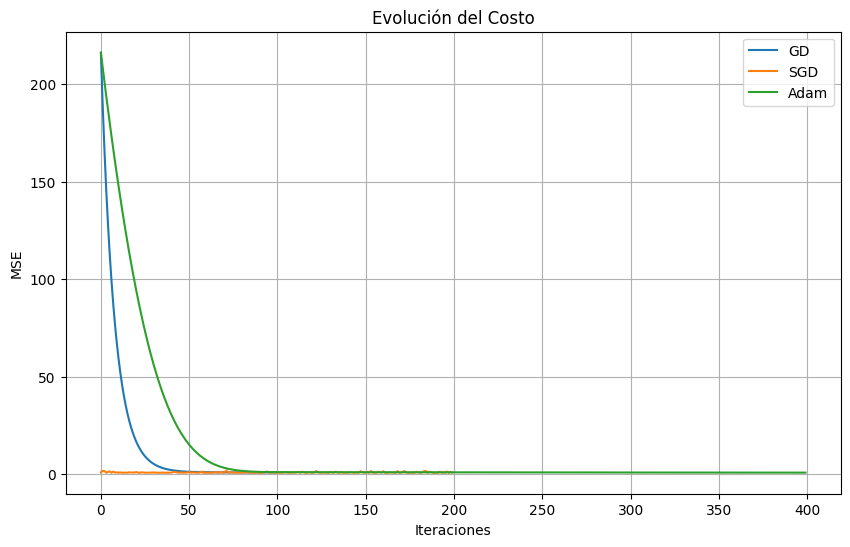

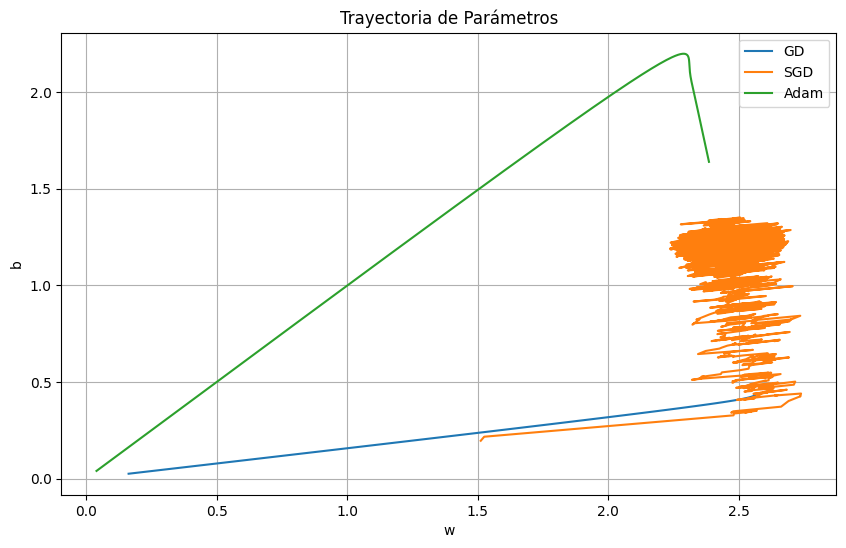

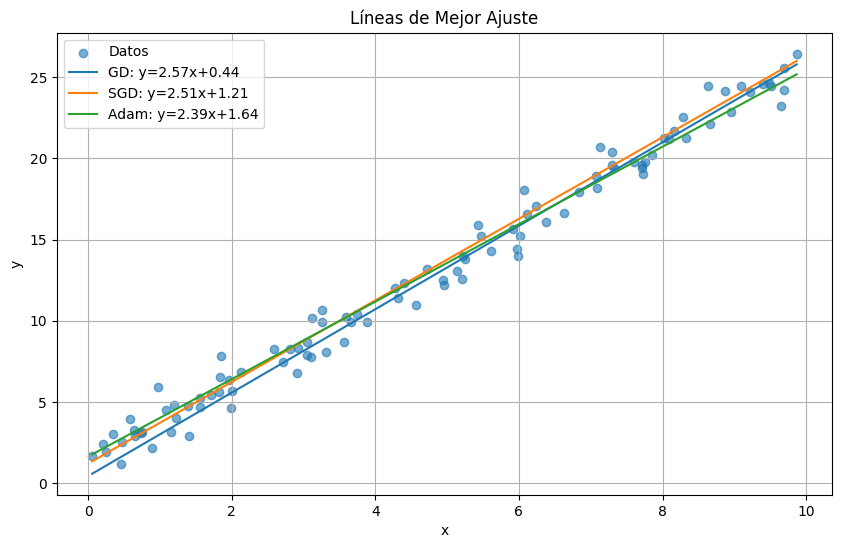

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generate_data(n=100, noise=1.0, seed=42):
    """
    Genera datos sintéticos para regresión lineal.

    Crea 'n' puntos con valores de entrada x distribuidos uniformemente entre 0 y 10,
    y valores de salida y calculados con una relación lineal (y = 2.5x + 1.0)
    más ruido gaussiano agregado.

    Parámetros:
    n : int, opcional
        Número de muestras a generar. Por defecto 100.
    noise : float, opcional
        Desviación estándar del ruido gaussiano agregado a y. Por defecto 1.0.
    seed : int, opcional
        Valor de semilla para asegurar reproducibilidad. Por defecto 42.

    Retorna:
    x : np.ndarray
        Valores de entrada generados aleatoriamente.
    y : np.ndarray
        Valores de salida con relación lineal y ruido agregado.
    """
    np.random.seed(seed)
    x = np.random.uniform(0, 10, n)
    y = 2.5 * x + 1.0 + np.random.normal(0, noise, n)
    return x, y


def mse(y, y_pred):
    """
    Calcula el error cuadrático medio (Mean Squared Error).

    Parámetros:
    y : np.ndarray
        Valores reales.
    y_pred : np.ndarray
        Valores predichos por el modelo.

    Retorna:
    float
        El valor medio del error cuadrático.
    """
    return np.mean((y - y_pred) ** 2)


def gradients(x, y, y_pred):
    """
    Calcula los gradientes del error respecto a los parámetros w y b
    para una función lineal y = wx + b.

    Parámetros:
    x : np.ndarray
        Valores de entrada.
    y : np.ndarray
        Valores reales de salida.
    y_pred : np.ndarray
        Valores predichos por el modelo.

    Retorna:
    dw : float
        Gradiente del error con respecto a w.
    db : float
        Gradiente del error con respecto a b.
    """
    e = y_pred - y
    n = len(y)
    return (2 / n) * np.sum(e * x), (2 / n) * np.sum(e)


def train(x, y, method="gd", lr=0.001, iters=500, batch_size=1, beta1=0.9, beta2=0.999, eps=1e-8):
    """
    Entrena un modelo de regresión lineal utilizando distintos métodos de optimización.

    Parámetros:
    x : np.ndarray
        Vector de características (input).
    y : np.ndarray
        Vector de etiquetas (output).
    method : str, opcional
        Algoritmo de optimización: "gd", "sgd" o "adam". Por defecto "gd".
    lr : float, opcional
        Tasa de aprendizaje. Por defecto 0.01.
    iters : int, opcional
        Número de iteraciones del entrenamiento. Por defecto 1000.
    batch_size : int, opcional
        Tamaño de los mini-lotes, usado solo si method="sgd". Por defecto 1.
    beta1 : float, opcional
        Coeficiente de decaimiento para el primer momento (Adam). Por defecto 0.9.
    beta2 : float, opcional
        Coeficiente de decaimiento para el segundo momento (Adam). Por defecto 0.999.
    eps : float, opcional
        Valor pequeño para evitar división por cero (Adam). Por defecto 1e-8.

    Retorna:
    w : float
        Peso aprendido (pendiente).
    b : float
        Sesgo aprendido (intercepto).
    cost : list of float
        Historia del error cuadrático medio por iteración.
    w_hist : list of float
        Historial de valores del parámetro w.
    b_hist : list of float
        Historial de valores del parámetro b.
    """
    w = b = m_w = m_b = v_w = v_b = 0
    cost, w_hist, b_hist = [], [], []

    for i in range(1, iters + 1):
        # Optimización usando Stochastic Gradient Descent (SGD) con mini-batches
        if method == "sgd":
            idx = np.random.permutation(len(x))
            x, y = x[idx], y[idx]
            for j in range(0, len(x), batch_size):
                xb, yb = x[j : j + batch_size], y[j : j + batch_size]
                y_pred = w * xb + b
                dw, db = gradients(xb, yb, y_pred)
                w -= lr * dw
                b -= lr * db
                w_hist.append(w)
                b_hist.append(b)
            cost.append(mse(y, w * x + b))
        # Optimización usando Adam (Adaptive Moment Estimation)
        elif method == "adam":
            y_pred = w * x + b
            dw, db = gradients(x, y, y_pred)
            m_w, m_b = beta1 * m_w + (1 - beta1) * dw, beta1 * m_b + (1 - beta1) * db
            v_w, v_b = beta2 * v_w + (1 - beta2) * dw**2, beta2 * v_b + (1 - beta2) * db**2
            mw_hat, mb_hat = m_w / (1 - beta1**i), m_b / (1 - beta1**i)
            vw_hat, vb_hat = v_w / (1 - beta2**i), v_b / (1 - beta2**i)
            w -= lr * mw_hat / (np.sqrt(vw_hat) + eps)
            b -= lr * mb_hat / (np.sqrt(vb_hat) + eps)
            w_hist.append(w)
            b_hist.append(b)
            cost.append(mse(y, y_pred))
        else:  # Optimización usando Gradient Descent (GD) clásico
            y_pred = w * x + b
            dw, db = gradients(x, y, y_pred)
            w -= lr * dw
            b -= lr * db
            w_hist.append(w)
            b_hist.append(b)
            cost.append(mse(y, y_pred))

    return w, b, cost, w_hist, b_hist


def plot_cost(histories):
    """
    Grafica la evolución del error cuadrático medio (MSE) para diferentes métodos de entrenamiento.

    Parámetros:
    histories : dict
        Diccionario donde cada clave es el nombre de un método (por ejemplo "GD", "SGD", "Adam") y
        cada valor es una lista con los valores del MSE por iteración durante el entrenamiento.

    Retorna:
    None
        La función solo muestra la gráfica y no retorna valores.
    """
    # Se crea una figura y se grafica el MSE por iteración para cada método registrado en histories
    plt.figure(figsize=(10, 6))
    for label, cost in histories.items():
        plt.plot(cost, label=label)
    plt.xlabel("Iteraciones")
    plt.ylabel("MSE")
    plt.title("Evolución del Costo")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_params(w_hist, b_hist):
    """
    Grafica la trayectoria de los parámetros w (pendiente) y b (intercepto) durante el entrenamiento
    para distintos métodos de optimización.

    Parámetros:
    w_hist : dict
        Diccionario donde cada clave es el nombre de un método (por ejemplo "GD", "SGD", "Adam") y
        cada valor es una lista con los valores del parámetro w por iteración.

    b_hist : dict
        Diccionario con la misma estructura que w_hist, pero para los valores del parámetro b.

    Retorna:
    None
        La función muestra la gráfica pero no retorna valores.
    """
    # Se grafica la trayectoria en el espacio (w, b) de cada método de entrenamiento
    plt.figure(figsize=(10, 6))
    for label in w_hist:
        plt.plot(w_hist[label], b_hist[label], label=label)
    plt.xlabel("w")
    plt.ylabel("b")
    plt.title("Trayectoria de Parámetros")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_fit(x, y, params):
    """
    Grafica los datos originales junto con las líneas de mejor ajuste obtenidas por diferentes métodos.

    Parámetros:
    x : np.ndarray
        Vector de valores de entrada (features).
    y : np.ndarray
        Vector de valores de salida (etiquetas reales).
    params : dict
        Diccionario donde cada clave es el nombre de un método (por ejemplo "GD", "SGD", "Adam") y
        cada valor es una tupla (w, b) que representa la pendiente y el intercepto aprendidos.

    Retorna:
    None
        La función muestra la gráfica pero no retorna valores.
    """
    # Se grafica el conjunto de datos junto con las líneas de regresión para cada método
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, label="Datos")
    x_line = np.linspace(min(x), max(x), 100)
    for label, (w, b) in params.items():
        plt.plot(x_line, w * x_line + b, label=f"{label}: y={w:.2f}x+{b:.2f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Líneas de Mejor Ajuste")
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    # Generación de los datos sintéticos de entrenamiento (x: input, y: salida)
    x, y = generate_data()

    # Definición de los métodos de optimización a utilizar junto con sus hiperparámetros
    methods = {"GD": {"method": "gd", "iters": 100, "lr": 0.001}, "SGD": {"method": "sgd", "iters": 200, "batch_size": 1, "lr": 0.005}, "Adam": {"method": "adam", "iters": 400, "lr": 0.04}}

    # Diccionarios para almacenar resultados de cada método
    results = {}  # Almacena (w, b) finales por método
    cost_hist = {}  # Almacena la evolución del MSE por método
    w_hist = {}  # Almacena el historial de w por método
    b_hist = {}  # Almacena el historial de b por método

    # Entrenamiento usando cada método especificado
    for name, args in methods.items():
        print(f"\n{name}:")
        # Se entrena el modelo con el método correspondiente
        w, b, cost, w_h, b_h = train(x, y, **args)
        print(f"w: {w:.2f}, b: {b:.2f}, MSE: {cost[-1]:.2f}")

        # Almacenamiento de resultados
        results[name] = (w, b)
        cost_hist[name] = cost
        w_hist[name] = w_h
        b_hist[name] = b_h

    # Generación de las gráficas comparativas entre métodos
    print("\nGenerando gráficos...")
    plot_cost(cost_hist)
    plot_params(w_hist, b_hist)
    plot_fit(x, y, results)
